In [1]:
import numpy as np 
import pandas as pd 

df = pd.read_csv('titanic.csv')

In [2]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
df.shape

(891, 12)

### Titanic Dataset Description

In [ ]:
VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

### Plot how many of the passengers were children, youth, middle age and old?

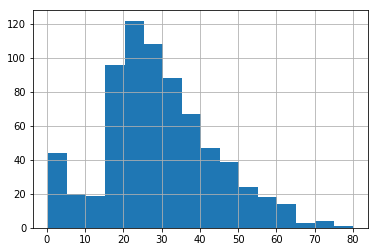

In [11]:
import matplotlib.pyplot as plt

df['Age'].hist(bins=16)
plt.show()

### How many of Age values are empty (or null)?

In [20]:
# how many of Age values are null
df['Age'].isna().sum()

177

In [21]:
# Parch = number of parents or children on board
# SibSp = number of siblings or spouses

### Create a new column as gender, when Sex is female it is zero when sex is male it is one

In [22]:
# create a new column as gender, when Sex is female it is zero when sex is male it is one
df['Gender'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

In [23]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Gender  
0      0         A/5 21171   7.2500   NaN        S       1  
1      0          PC 17599  71.2833   C85        C       0  
2      0  STON/O2. 3101282   7.9250   NaN        S       0  
3      0            113803  53.1000  C123        S       0  
4      0            373450   8.0500   NaN        S       1

### We have one more column (check it)

In [24]:
df.shape

(891, 13)

### Show the majority of Age range

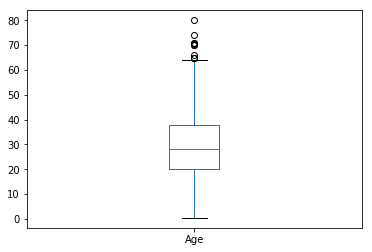

In [25]:
df['Age'].plot.box()

### List all of the Ages that are not null

In [1]:
df['Age'].dropna().values

NameError: name 'df' is not defined

### Slice the dataframe for those whose Embarked section was 'C'

In [37]:
df[df['Embarked'] == 'C'].head()

PassengerId  Survived  Pclass  \
1             2         1       1   
9            10         1       2   
19           20         1       3   
26           27         0       3   
30           31         0       1   

                                                 Name     Sex   Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
9                 Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
19                            Masselmani, Mrs. Fatima  female   NaN      0   
26                            Emir, Mr. Farred Chehab    male   NaN      0   
30                           Uruchurtu, Don. Manuel E    male  40.0      0   

    Parch    Ticket     Fare Cabin Embarked  Gender  
1       0  PC 17599  71.2833   C85        C       0  
9       0    237736  30.0708   NaN        C       0  
19      0      2649   7.2250   NaN        C       0  
26      0      2631   7.2250   NaN        C       1  
30      0  PC 17601  27.7208   NaN        C       1

### Plot the Age range for those whose Embraked were 'C'

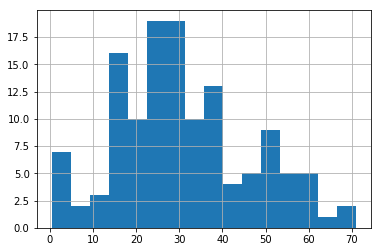

In [38]:
#Activity: 
# the age range of passenger whose their Embarked were 'C'
df[df['Embarked'] == 'C']['Age'].hist(bins=16)

### Apply couple of Normal Distributions to Histogram obtained above 

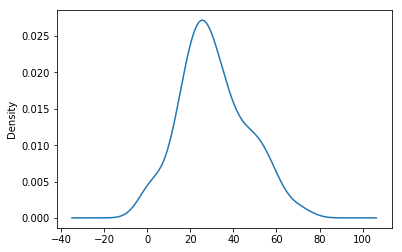

In [20]:
df[df['Embarked'] == 'C']['Age'].plot(kind='kde')

### Describe a specific column 

In [39]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

### How many unique values does the 'Embraked' have?

In [74]:
df['Embarked'].nunique()

3

### Count the different 'Embarked' values the dataframe has

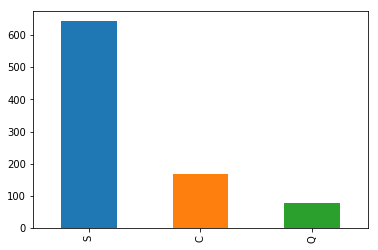

In [47]:
df['Embarked'].value_counts().plot(kind='bar')

### Count the different 'Embarked' values the dataframe has and plot horizontaly

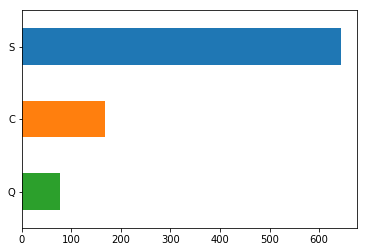

In [83]:
df['Embarked'].value_counts().plot('barh').invert_yaxis()

# Check df['Embarked'].value_counts().plot('barh')

### Another way to do the count and plot it

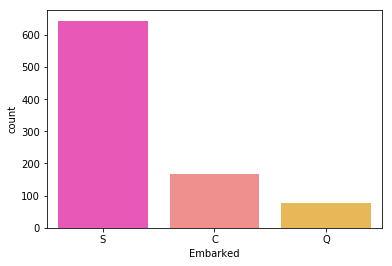

In [7]:
import seaborn as sns


# Bar Chart Example #1 (Simple): Categorical Variables Showing Counts
sns.countplot(x="Embarked", palette="spring", data=df)


In [48]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
df['Sex'].value_counts().to_json()

'{"male":577,"female":314}'

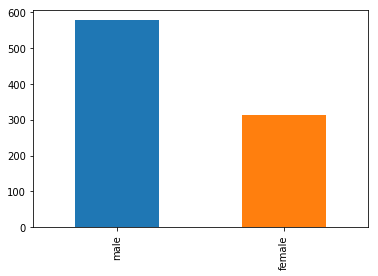

In [49]:
df['Sex'].value_counts().plot(kind='bar')

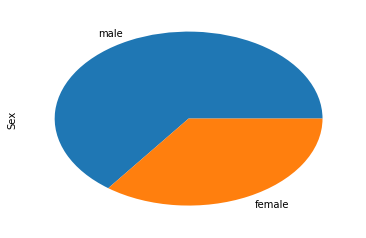

In [3]:
df['Sex'].value_counts().plot(kind='pie')

### Plot how many of the passengers were children, youth, middle age and old based on there Sex for those who 'Embarked' in section 'C'?

In [15]:
for i in df[df['Embarked'] == 'C'].groupby('Sex')['Age']:
    print(i)
    

('female', 1      38.00
9      14.00
19       NaN
31       NaN
39     14.00
43      3.00
52     49.00
111    14.50
114    17.00
128      NaN
140      NaN
177    50.00
194    44.00
195    58.00
215    31.00
218    32.00
240      NaN
255    29.00
256      NaN
258    35.00
291    19.00
299    50.00
306      NaN
307    17.00
309    30.00
310    24.00
311    18.00
319    40.00
325    36.00
329    16.00
       ...  
496    54.00
513    54.00
523    44.00
533      NaN
537    30.00
539    22.00
556    48.00
578      NaN
581    39.00
591    52.00
608    22.00
641    24.00
644     0.75
691     4.00
700    18.00
702    18.00
710    24.00
716    38.00
742    21.00
780    13.00
830    15.00
835    39.00
842    30.00
849      NaN
852     9.00
858    24.00
866    27.00
874    28.00
875    15.00
879    56.00
Name: Age, Length: 73, dtype: float64)
('male', 26       NaN
30     40.00
34     28.00
36       NaN
42       NaN
48       NaN
54     65.00
57     28.50
60     22.00
64       NaN
65       NaN
73   

Sex
female    AxesSubplot(0.125,0.125;0.775x0.755)
male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

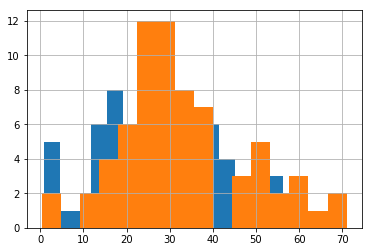

In [62]:
df[df['Embarked'] == 'C'].groupby('Sex')['Age'].hist(bins=16)

In [64]:
df[df['Embarked'] == 'C'].groupby('Sex')['Age'].value_counts()


Sex     Age  
female  24.00    5
        17.00    3
        18.00    3
        30.00    3
        0.75     2
        14.00    2
        15.00    2
        22.00    2
        23.00    2
        38.00    2
        39.00    2
        44.00    2
        50.00    2
        54.00    2
        1.00     1
        3.00     1
        4.00     1
        5.00     1
        9.00     1
        13.00    1
        14.50    1
        16.00    1
        19.00    1
        21.00    1
        27.00    1
        28.00    1
        29.00    1
        31.00    1
        32.00    1
        35.00    1
                ..
male    49.00    3
        17.00    2
        23.00    2
        24.00    2
        29.00    2
        33.00    2
        56.00    2
        58.00    2
        71.00    2
        0.42     1
        1.00     1
        11.00    1
        12.00    1
        15.00    1
        18.00    1
        23.50    1
        28.00    1
        28.50    1
        31.00    1
        32.00    1
        32.50    

In [69]:
# # import the pandas library
# import pandas as pd
# import numpy as np

# ipl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
#          'kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
#          'Rank': [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
#          'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
#          'Points':[876,789,863,673,741,812,756,788,694,701,804,690]}
# df = pd.DataFrame(ipl_data)

# grouped = df.groupby('Year')
# df.groupby('Year')['Points'].agg(np.mean)

# https://www.tutorialspoint.com/python_pandas/python_pandas_groupby.htm

### What is the average Age for female and male (based on sex) for those who have 'Embarked' on section 'C'?

In [70]:
df[df['Embarked'] == 'C'].groupby('Sex')['Age'].agg(np.mean)

Sex
female    28.344262
male      32.998841
Name: Age, dtype: float64

### Which Age is the oldest for female and male (based on sex) for those who have 'Embarked' on section 'C'?

In [71]:
df[df['Embarked'] == 'C'].groupby('Sex')['Age'].agg(np.max)

Sex
female    60.0
male      71.0
Name: Age, dtype: float64

### For different Ages, plot the Fare they have paid?

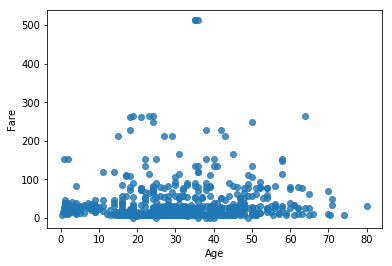

In [75]:
sns.regplot(x="Age", y="Fare", fit_reg=False, data=df)

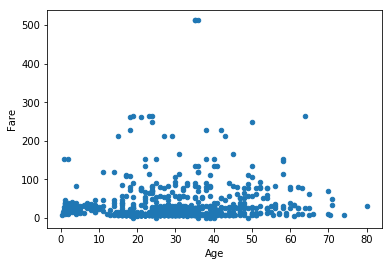

In [78]:
df.plot.scatter(x="Age", y="Fare")

### Plot how percentage Survived for two Sex group based on the passengers class 

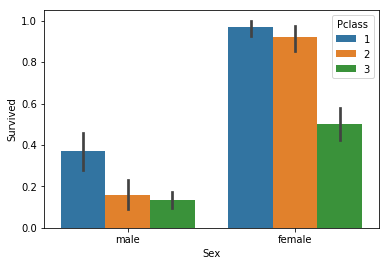

In [94]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=df)

### Plot how many male or female were in different Passenger classes

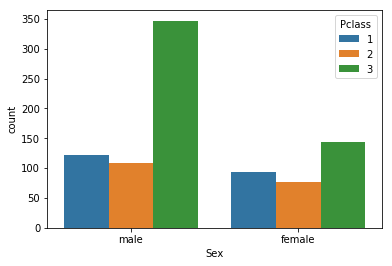

In [96]:
sns.countplot(x="Sex", hue="Pclass", data=df)

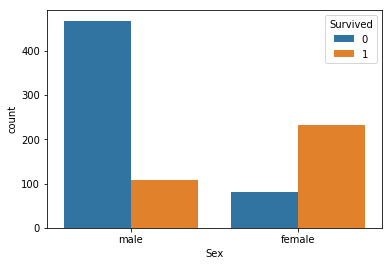

In [4]:
import seaborn as sns
sns.countplot(x="Sex", hue="Survived", data=df)

In [6]:
pd.crosstab(df['Sex'], df['Survived']).to_json()

'{"0":{"female":81,"male":468},"1":{"female":233,"male":109}}'

### Verify values obtained for pertentage 

In [113]:
df[(df['Sex'] == 'female') & (df['Pclass'] == 1)]['Survived'].value_counts()

1    91
0     3
Name: Survived, dtype: int64

In [114]:
91/(91 + 3)

0.9680851063829787

### Stack plot of count based on Sex for different Passenger Class

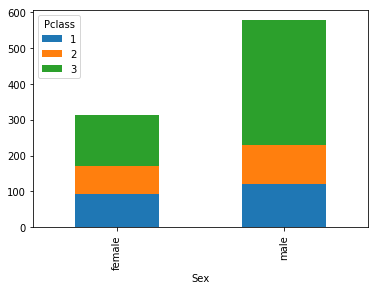

In [118]:
df.groupby(['Sex'])['Pclass'].value_counts().unstack().plot(kind='bar',stacked=True)

### Stack plot of count based on Sex and Survival for different Passenger Class

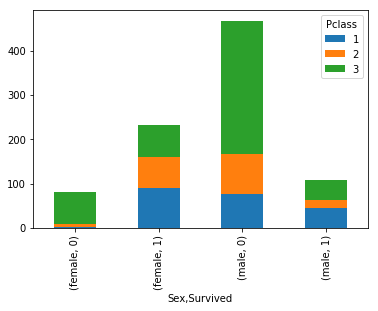

In [119]:
df.groupby(['Sex', 'Survived'])['Pclass'].value_counts().unstack().plot(kind='bar',stacked=True)

### Sometimes it is hard to read values from plot, what are the number of female and male at each Passenger Class

In [3]:
# df.groupby(['Sex'])['Pclass'].value_counts().unstack()
# the above and crosstab are the same 
pd.crosstab(df['Sex'], df['Pclass'])

Pclass    1    2    3
Sex                  
female   94   76  144
male    122  108  347

In [4]:
pd.crosstab(df['Sex'], df['Survived'])

Survived    0    1
Sex               
female     81  233
male      468  109

In [5]:
pd.crosstab(df['Sex'], df['Embarked'])

Embarked   C   Q    S
Sex                  
female    73  36  203
male      95  41  441

### How to represent the above cross tab in percentage and graphically present 

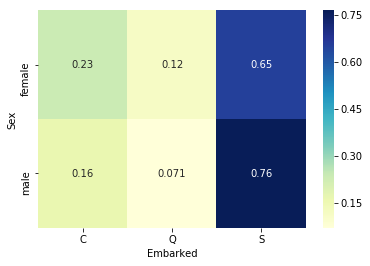

In [18]:
sns.heatmap(pd.crosstab(df['Sex'], df['Embarked'], normalize='index'), cmap="YlGnBu", annot=True)